In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [14]:
df = pd.read_csv("homeprices_banglore.csv")
df.head(2)

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00


In [15]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaledX = sx.fit_transform(df.drop("price", axis="columns"))
scaledY = sy.fit_transform(df["price"].values.reshape(df.shape[0], 1))

In [21]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    number_of_features = X.shape[1]
    w = np.ones(number_of_features)
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        y_predicted = np.dot(w, X.T) + b
        
        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(y_true-y_predicted))
        
#         if i%10==0:
#             cost_list.append(cost)
#             epoch_list.append(i)
        
        cost_list.append(cost)
        epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaledX, scaledY.reshape(scaledY.shape[0],),500)
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

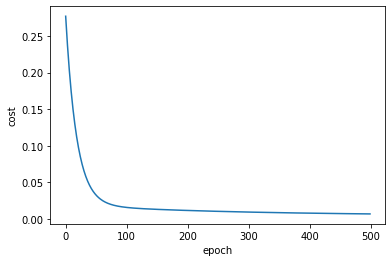

In [22]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [23]:
def predict(area,bedrooms,w,b):
    scaled_X = sx.transform([[area, bedrooms]])[0]

    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600,4,w,b)

128.45484403267596

In [38]:
import random

In [41]:
def SGD(X, y_true, epochs, learning_rate=0.01):
    number_of_features = X.shape[1]
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        random_index = random.randint(0, total_samples-1)
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(w, sample_x.T) + b
        
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.square(sample_y-y_predicted)
        
        cost_list.append(cost)
        epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = SGD(scaledX, scaledY.reshape(scaledY.shape[0],),500)
w_sgd, b_sgd, cost_sgd

(array([0.91339068, 0.89657282]), -0.1733858961402415, 0.00900534844936066)

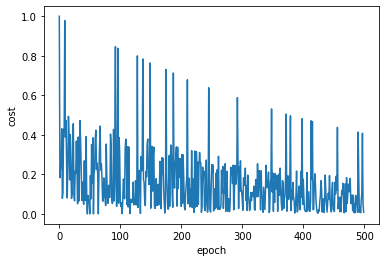

In [42]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

In [58]:
def mini_batch_gd(X, y_true, epochs, learning_rate=0.01, batch=5):
    number_of_features = X.shape[1]
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        random_index = [random.randint(0,total_samples-1) for _ in range(batch)] 
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(w, sample_x.T) + b
        
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*np.sum(sample_y-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(sample_y-y_predicted))
        
        cost_list.append(cost)
        epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w_bgd, b_bgd, cost_bgd, cost_list_bgd, epoch_list_bgd = mini_batch_gd(scaledX, scaledY.reshape(scaledY.shape[0],),500)
w_bgd, b_bgd, cost_bgd

(array([0.80516269, 0.77416532]), -0.2997537971359083, 0.021911657210940832)

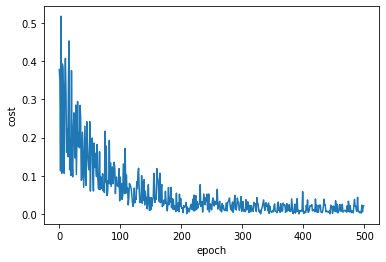

In [59]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_bgd,cost_list_bgd)